In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
df=fetch_california_housing()

In [5]:
fetch_california_housing()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
dataset=pd.DataFrame(df.data)

In [7]:
dataset.columns=df.feature_names

In [8]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [34]:
#All the independent features are in the dataset, saved in variable x
x=dataset
y=df.target
#y is the dependent variable, the target price which we need to predict

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [11]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [12]:
#standardizing the data set
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()



In [18]:
x_train=scaler.fit_transform(x_train)

In [16]:
x_test=scaler.transform(x_test)

In [20]:
#to inverse standardisation of z scores
#use inverse transform
#scaler.inverse_transform(x_train)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [37]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [38]:
mse=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [39]:
#above is a list for 5 folds of the given test data

In [40]:
mse # all the mse valuse for each fold

array([-0.56799593, -0.52918854, -0.48456478, -0.51627013, -0.54833859,
       -0.47884524, -0.47828648, -0.55465187, -0.55647389, -0.54248888])

In [41]:
# now we find the mean of all the MSE values

In [42]:
np.mean(mse)

-0.5257104326777

In [43]:
reg_pred=regression.predict(x_test)

In [44]:
reg_pred


array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

C:\Users\KIIT\AppData\Local\Temp\ipykernel_28556\2317801446.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reg_pred-y_test,kde='True',bins=10)


<Axes: ylabel='Density'>

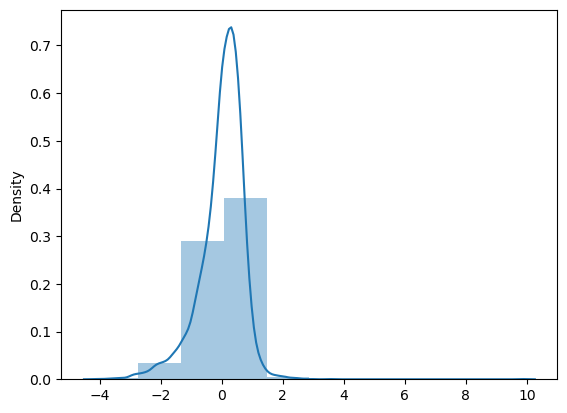

In [50]:
#to visualize the difference in the trained and predicted value
import seaborn as sns
sns.distplot(reg_pred-y_test,kde='True',bins=10)

In [51]:
from sklearn.metrics import r2_score

In [52]:
score=r2_score(reg_pred,y_test)

In [53]:
score

0.34513393809439596